# 1_Import

In [1]:
import json 
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

In [2]:
with open(r"C:\Users\manon\Dev\2023_boissons\beverage_dispenser.json") as f:
    data = json.load(f)

In [3]:
# impression uniquement des 10 premieres lignes 
for x in data["content"][:10] : 
    print (x)

{'date': '2019-11-14T11:53:35.000Z', 'product': 'refill', 'machine': 'A'}
{'date': '2019-11-14T12:06:35.000Z', 'product': 'coffee', 'machine': 'A'}
{'date': '2019-11-14T12:07:59.000Z', 'product': 'soda', 'machine': 'A'}
{'date': '2019-11-14T12:13:45.000Z', 'product': 'soda', 'machine': 'A'}
{'date': '2019-11-14T12:22:35.000Z', 'product': 'coffee', 'machine': 'A'}
{'date': '2019-11-14T12:37:44.000Z', 'product': 'soda', 'machine': 'A'}
{'date': '2019-11-14T12:47:09.000Z', 'product': 'refill', 'machine': 'B'}
{'date': '2019-11-14T12:47:52.000Z', 'product': 'coffee', 'machine': 'A'}
{'date': '2019-11-14T12:51:00.000Z', 'product': 'coffee', 'machine': 'A'}
{'date': '2019-11-14T12:52:49.000Z', 'product': 'coffee', 'machine': 'A'}


# 2_ Conversion du JSON en DataFrame

In [4]:
df_init = pd.json_normalize(data["content"])

In [5]:
# Le journal contient les ventes de produits et les "refill" par l'employé. Chaque ligne correspond à 
# une action (une vente d'une boisson ou un refill par l'employé). Il y a bien 4 machines.

In [6]:
df_init

,date,product,machine
0,2019-11-14T11:53:35.000Z,refill,A
1,2019-11-14T12:06:35.000Z,coffee,A
2,2019-11-14T12:07:59.000Z,soda,A
3,2019-11-14T12:13:45.000Z,soda,A
4,2019-11-14T12:22:35.000Z,coffee,A
...,...,...,...
11037,2019-12-25T20:10:53.000Z,nrj,A
11038,2019-12-25T20:16:30.000Z,nrj,B
11039,2019-12-25T20:26:35.000Z,nrj,B
11040,2019-12-25T21:11:55.000Z,nrj,B


In [7]:
df1 = df_init# .copy()

In [8]:
df1

,date,product,machine
0,2019-11-14T11:53:35.000Z,refill,A
1,2019-11-14T12:06:35.000Z,coffee,A
2,2019-11-14T12:07:59.000Z,soda,A
3,2019-11-14T12:13:45.000Z,soda,A
4,2019-11-14T12:22:35.000Z,coffee,A
...,...,...,...
11037,2019-12-25T20:10:53.000Z,nrj,A
11038,2019-12-25T20:16:30.000Z,nrj,B
11039,2019-12-25T20:26:35.000Z,nrj,B
11040,2019-12-25T21:11:55.000Z,nrj,B


 # 3_ Observation du nombre de refill qu'il y a eu au total

In [9]:
# l'employé remplie bien les 4 machines sur chacun de ses déplacements
# il y a 6 refills sur la période
df1[df1["product"]=="refill"].sort_values(by="date")

,date,product,machine
0,2019-11-14T11:53:35.000Z,refill,A
6,2019-11-14T12:47:09.000Z,refill,B
24,2019-11-14T13:51:23.000Z,refill,C
43,2019-11-14T14:54:30.000Z,refill,D
1840,2019-11-21T11:55:39.000Z,refill,A
1851,2019-11-21T13:33:01.000Z,refill,B
1862,2019-11-21T14:01:57.000Z,refill,C
1883,2019-11-21T15:00:58.000Z,refill,D
3678,2019-11-28T11:54:41.000Z,refill,A
3686,2019-11-28T12:54:01.000Z,refill,B


# 4_ Créations df1, df1 items et frais

In [10]:
items_machines = {"item" : ["coffee", "soda", "nrj"], 
                  "prix_de_vente" : [1, 1.6, 1.8],
                  "cout_achat" : [0.3, 0.6, 0.8], 
                  "capacite" : [280, 120, 60]}

In [11]:
df_items = pd.DataFrame(data=items_machines)
df_items 

,item,prix_de_vente,cout_achat,capacite
0,coffee,1.0,0.3,280
1,soda,1.6,0.6,120
2,nrj,1.8,0.8,60


In [12]:
frais = {"type_de_frais" : ["fixe", "a_ajouter_par_machine"],
         "nb_machines" : [4, 4],
         "deplacement_par_machine" : [50, 20],
         "emplacement_mensuel" : [0, 150],
         "entretien_mensuel" : [0, 120]}

In [13]:
df_frais = pd.DataFrame(data=frais)
df_frais 
# exemple : déplacement d'un employé coûte 50 euros pour aller à la gare + 20 euros par machine
# soit 50+(20*4)

,type_de_frais,nb_machines,deplacement_par_machine,emplacement_mensuel,entretien_mensuel
0,fixe,4,50,0,0
1,a_ajouter_par_machine,4,20,150,120


# 5_Essai 1

## Ajout de colonnes sur le df1 original 
* jour_semaine
* stock restant / produit (=3 colonnes)


## Suivi du stock dans le temps

In [14]:
df1["weekday"] = 0
df1["stock_coffee_A"] = 0
df1["stock_soda_A"] = 0
df1["stock_nrj_A"] = 0
df1["stock_coffee_B"] = 0
df1["stock_soda_B"] = 0
df1["stock_nrj_B"] = 0
df1["stock_coffee_C"] = 0
df1["stock_soda_C"] = 0
df1["stock_nrj_C"] = 0
df1["stock_coffee_D"] = 0
df1["stock_soda_D"] = 0
df1["stock_nrj_D"] = 0

In [15]:
# Pour refill je remplis les stocks d'items, pour le reste je soustrais 1 à chaque item acheté et
# je copie la ligne précédente à partir de la derniere colonne qui ne contient pas mes stocks
# je ne copie pas la ligne précédente entièrement car je ne veux pas copier la date, ou le type de produits car sinon 
# je perds toutes les infos fixes du df1
for i in range(len(df1)) : 
    if ((df1["product"].iloc[i] == "refill") & (df1["machine"].iloc[i] == "A")) :
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:] 
        df1.loc[i, "stock_coffee_A"] = 280
        df1.loc[i, "stock_soda_A"] = 120
        df1.loc[i, "stock_nrj_A"] = 60
    elif ((df1["product"].iloc[i] == "refill") & (df1["machine"].iloc[i] == "B")) :
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]
        df1.loc[i, "stock_coffee_B"] = 280
        df1.loc[i, "stock_soda_B"] = 120
        df1.loc[i, "stock_nrj_B"] = 60        
    elif ((df1["product"].iloc[i] == "refill") & (df1["machine"].iloc[i] == "C")) :
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]
        df1.loc[i, "stock_coffee_C"] = 280
        df1.loc[i, "stock_soda_C"] = 120
        df1.loc[i, "stock_nrj_C"] = 60  
    elif ((df1["product"].iloc[i] == "refill") & (df1["machine"].iloc[i] == "D")) :
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]
        df1.loc[i, "stock_coffee_D"] = 280
        df1.loc[i, "stock_soda_D"]= 120
        df1.loc[i, "stock_nrj_D"] = 60  

    elif ((df1["product"].iloc[i] == "coffee") & (df1["machine"].iloc[i] == "A")): 
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]
        df1.loc[i, "stock_coffee_A"] = df1["stock_coffee_A"].iloc[i-1] - 1
    elif ((df1["product"].iloc[i] == "coffee") & (df1["machine"].iloc[i] == "B")):
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]
        df1.loc[i, "stock_coffee_B"] = df1["stock_coffee_B"].iloc[i-1] - 1
    elif ((df1["product"].iloc[i] == "coffee") & (df1["machine"].iloc[i] == "C")):
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]
        df1.loc[i, "stock_coffee_C"] = df1["stock_coffee_C"].iloc[i-1] - 1
    elif ((df1["product"].iloc[i] == "coffee") & (df1["machine"].iloc[i] == "D")):
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]
        df1.loc[i, "stock_coffee_D"] = df1["stock_coffee_D"].iloc[i-1] - 1

    elif ((df1["product"].iloc[i] == "soda") & (df1["machine"].iloc[i] == "A")): 
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]    
        df1.loc[i, "stock_soda_A"] = df1["stock_soda_A"].iloc[i-1] - 1
    elif ((df1["product"].iloc[i] == "soda") & (df1["machine"].iloc[i] == "B")): 
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]   
        df1.loc[i, "stock_soda_B"] = df1["stock_soda_B"].iloc[i-1] - 1            
    elif ((df1["product"].iloc[i] == "soda") & (df1["machine"].iloc[i] == "C")): 
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]    
        df1.loc[i, "stock_soda_C"] = df1["stock_soda_C"].iloc[i-1] - 1            
    elif ((df1["product"].iloc[i] == "soda") & (df1["machine"].iloc[i] == "D")): 
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]    
        df1.loc[i, "stock_soda_D"] = df1["stock_soda_D"].iloc[i-1] - 1        

    elif ((df1["product"].iloc[i] == "nrj") & (df1["machine"].iloc[i] == "A")): 
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]  
        df1.loc[i, "stock_nrj_A"] = df1["stock_nrj_A"].iloc[i-1] - 1
    elif ((df1["product"].iloc[i] == "nrj") & (df1["machine"].iloc[i] == "B")): 
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]
        df1.loc[i, "stock_nrj_B"] = df1["stock_nrj_B"].iloc[i-1] - 1            
    elif ((df1["product"].iloc[i] == "nrj") & (df1["machine"].iloc[i] == "C")): 
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]     
        df1.loc[i, "stock_nrj_C"] = df1["stock_nrj_C"].iloc[i-1] - 1
    elif ((df1["product"].iloc[i] == "nrj") & (df1["machine"].iloc[i] == "D")): 
        df1.iloc[i, 4:] = df1.iloc[i-1, 4:]     
        df1.loc[i, "stock_nrj_D"] = df1["stock_nrj_D"].iloc[i-1] - 1             

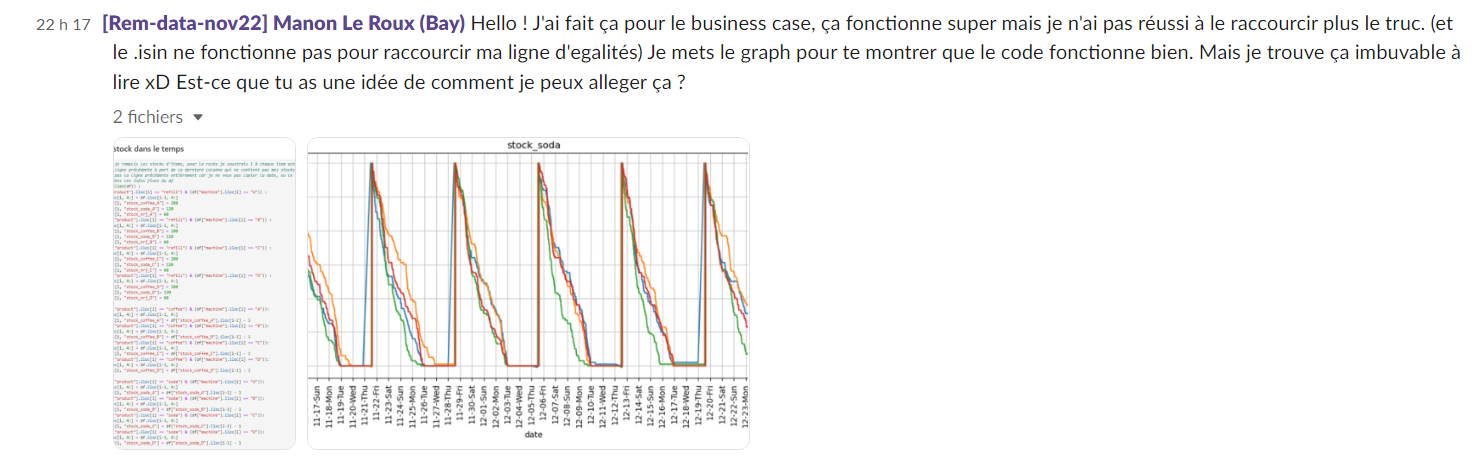

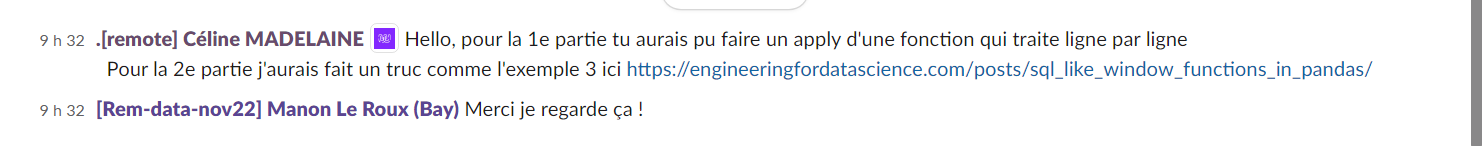

 https://engineeringfordatascience.com/posts/sql_like_window_functions_in_pandas/

In [16]:
df1[df1["product"]=="refill"].head(4)

,date,product,machine,weekday,stock_coffee_A,stock_soda_A,stock_nrj_A,stock_coffee_B,stock_soda_B,stock_nrj_B,stock_coffee_C,stock_soda_C,stock_nrj_C,stock_coffee_D,stock_soda_D,stock_nrj_D
0,2019-11-14T11:53:35.000Z,refill,A,0,280,120,60,0,0,0,0,0,0,0,0,0
6,2019-11-14T12:47:09.000Z,refill,B,0,278,117,60,280,120,60,0,0,0,0,0,0
24,2019-11-14T13:51:23.000Z,refill,C,0,268,115,60,275,120,60,280,120,60,0,0,0
43,2019-11-14T14:54:30.000Z,refill,D,0,266,114,60,270,119,60,274,118,59,280,120,60


In [17]:
df1.head(2)

,date,product,machine,weekday,stock_coffee_A,stock_soda_A,stock_nrj_A,stock_coffee_B,stock_soda_B,stock_nrj_B,stock_coffee_C,stock_soda_C,stock_nrj_C,stock_coffee_D,stock_soda_D,stock_nrj_D
0,2019-11-14T11:53:35.000Z,refill,A,0,280,120,60,0,0,0,0,0,0,0,0,0
1,2019-11-14T12:06:35.000Z,coffee,A,0,279,120,60,0,0,0,0,0,0,0,0,0


## Récupérer jour semaine -> weekday

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11042 entries, 0 to 11041
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            11042 non-null  object
 1   product         11042 non-null  object
 2   machine         11042 non-null  object
 3   weekday         11042 non-null  int64 
 4   stock_coffee_A  11042 non-null  int64 
 5   stock_soda_A    11042 non-null  int64 
 6   stock_nrj_A     11042 non-null  int64 
 7   stock_coffee_B  11042 non-null  int64 
 8   stock_soda_B    11042 non-null  int64 
 9   stock_nrj_B     11042 non-null  int64 
 10  stock_coffee_C  11042 non-null  int64 
 11  stock_soda_C    11042 non-null  int64 
 12  stock_nrj_C     11042 non-null  int64 
 13  stock_coffee_D  11042 non-null  int64 
 14  stock_soda_D    11042 non-null  int64 
 15  stock_nrj_D     11042 non-null  int64 
dtypes: int64(13), object(3)
memory usage: 1.3+ MB


In [19]:
df1["date"] = pd.to_datetime(df1["date"]).dt.tz_localize(None)

In [20]:
df1["weekday"] = df1["date"].apply(lambda x: x.weekday())

In [21]:
df1.head(2)

,date,product,machine,weekday,stock_coffee_A,stock_soda_A,stock_nrj_A,stock_coffee_B,stock_soda_B,stock_nrj_B,stock_coffee_C,stock_soda_C,stock_nrj_C,stock_coffee_D,stock_soda_D,stock_nrj_D
0,2019-11-14 11:53:35,refill,A,3,280,120,60,0,0,0,0,0,0,0,0,0
1,2019-11-14 12:06:35,coffee,A,3,279,120,60,0,0,0,0,0,0,0,0,0


In [22]:
# pour ajouter les vacances sco : https://pypi.org/project/jours-feries-france/

In [23]:
df1

,date,product,machine,weekday,stock_coffee_A,stock_soda_A,stock_nrj_A,stock_coffee_B,stock_soda_B,stock_nrj_B,stock_coffee_C,stock_soda_C,stock_nrj_C,stock_coffee_D,stock_soda_D,stock_nrj_D
0,2019-11-14 11:53:35,refill,A,3,280,120,60,0,0,0,0,0,0,0,0,0
1,2019-11-14 12:06:35,coffee,A,3,279,120,60,0,0,0,0,0,0,0,0,0
2,2019-11-14 12:07:59,soda,A,3,279,119,60,0,0,0,0,0,0,0,0,0
3,2019-11-14 12:13:45,soda,A,3,279,118,60,0,0,0,0,0,0,0,0,0
4,2019-11-14 12:22:35,coffee,A,3,278,118,60,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,2019-12-25 20:10:53,nrj,A,2,0,0,3,0,0,3,0,0,0,0,0,0
11038,2019-12-25 20:16:30,nrj,B,2,0,0,3,0,0,2,0,0,0,0,0,0
11039,2019-12-25 20:26:35,nrj,B,2,0,0,3,0,0,1,0,0,0,0,0,0
11040,2019-12-25 21:11:55,nrj,B,2,0,0,3,0,0,0,0,0,0,0,0,0


## Graphiques pénuries 

In [24]:
coffee = df1[["date", "stock_coffee_A", "stock_coffee_B", "stock_coffee_C", "stock_coffee_D"]]
soda = df1[["date", "stock_soda_A", "stock_soda_B", "stock_soda_C", "stock_soda_D"]]
nrj = df1[["date", "stock_nrj_A", "stock_nrj_B", "stock_nrj_C", "stock_nrj_D"]]

In [25]:
coffee

,date,stock_coffee_A,stock_coffee_B,stock_coffee_C,stock_coffee_D
0,2019-11-14 11:53:35,280,0,0,0
1,2019-11-14 12:06:35,279,0,0,0
2,2019-11-14 12:07:59,279,0,0,0
3,2019-11-14 12:13:45,279,0,0,0
4,2019-11-14 12:22:35,278,0,0,0
...,...,...,...,...,...
11037,2019-12-25 20:10:53,0,0,0,0
11038,2019-12-25 20:16:30,0,0,0,0
11039,2019-12-25 20:26:35,0,0,0,0
11040,2019-12-25 21:11:55,0,0,0,0


In [26]:
coffee["date"] = pd.to_datetime(coffee["date"])

C:\Users\manon\AppData\Local\Temp\ipykernel_10952\877293851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee["date"] = pd.to_datetime(coffee["date"])


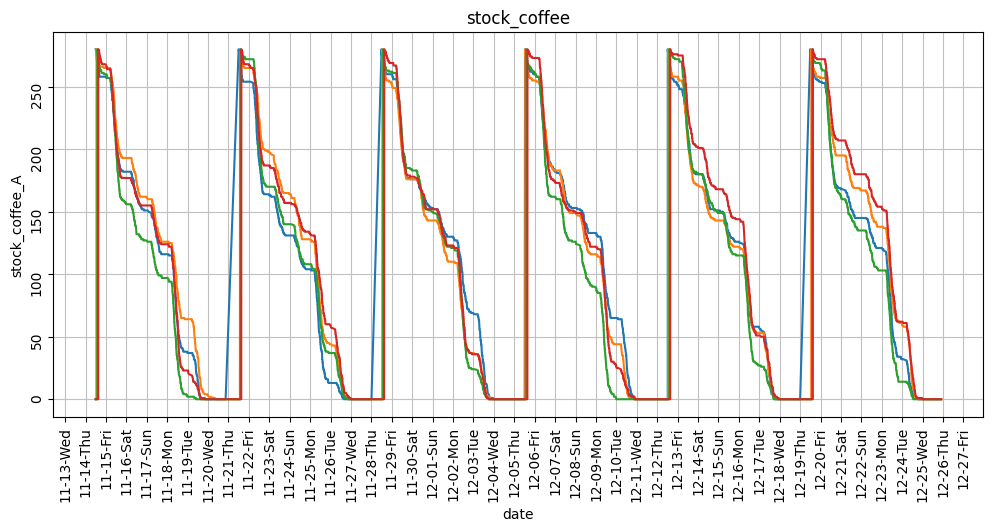

In [27]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title("stock_coffee")
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%a"))
ax.grid(True,color="silver")
sns.lineplot(data=coffee, x="date",y="stock_coffee_A")
sns.lineplot(data=coffee, x="date",y="stock_coffee_B")
sns.lineplot(data=coffee, x="date",y="stock_coffee_C")
sns.lineplot(data=coffee, x="date",y="stock_coffee_D")
plt.tick_params(labelrotation=90)
plt.show()

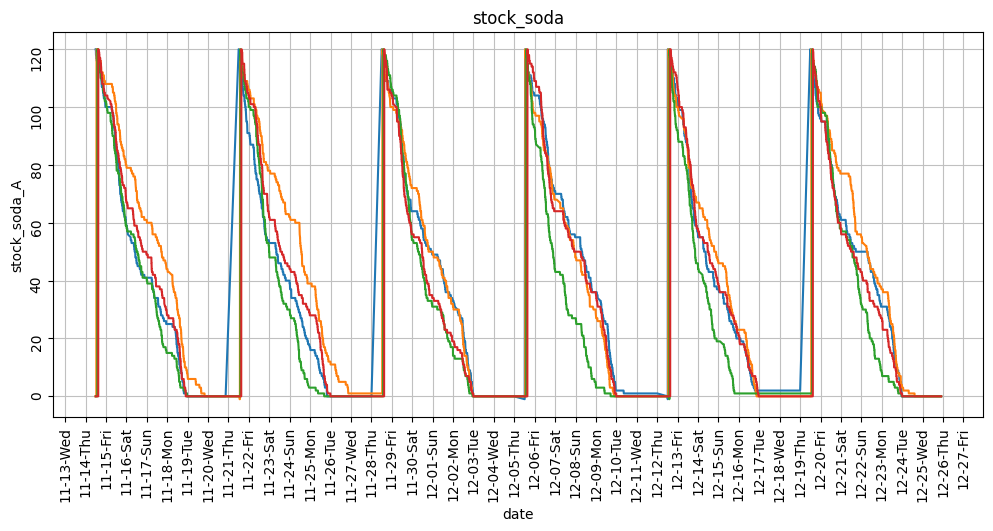

In [28]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title("stock_soda")
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%a"))
ax.grid(True,color="silver")
sns.lineplot(data=soda, x="date",y="stock_soda_A")
sns.lineplot(data=soda, x="date",y="stock_soda_B")
sns.lineplot(data=soda, x="date",y="stock_soda_C")
sns.lineplot(data=soda, x="date",y="stock_soda_D")
plt.tick_params(labelrotation=90)
plt.show()

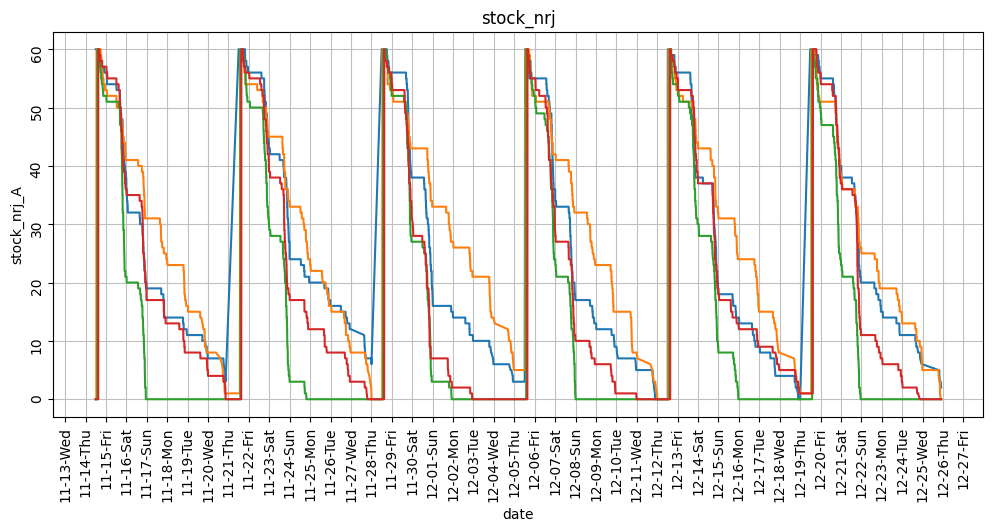

In [29]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title("stock_nrj")
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%a"))
ax.grid(True,color="silver")
sns.lineplot(data=nrj, x="date",y="stock_nrj_A")
sns.lineplot(data=nrj, x="date",y="stock_nrj_B")
sns.lineplot(data=nrj, x="date",y="stock_nrj_C")
sns.lineplot(data=nrj, x="date",y="stock_nrj_D")
plt.tick_params(labelrotation=90)
plt.show()

# Essai2 Amélioration du code fonction/vectorisation

In [30]:
df_init

,date,product,machine,weekday,stock_coffee_A,stock_soda_A,stock_nrj_A,stock_coffee_B,stock_soda_B,stock_nrj_B,stock_coffee_C,stock_soda_C,stock_nrj_C,stock_coffee_D,stock_soda_D,stock_nrj_D
0,2019-11-14 11:53:35,refill,A,3,280,120,60,0,0,0,0,0,0,0,0,0
1,2019-11-14 12:06:35,coffee,A,3,279,120,60,0,0,0,0,0,0,0,0,0
2,2019-11-14 12:07:59,soda,A,3,279,119,60,0,0,0,0,0,0,0,0,0
3,2019-11-14 12:13:45,soda,A,3,279,118,60,0,0,0,0,0,0,0,0,0
4,2019-11-14 12:22:35,coffee,A,3,278,118,60,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,2019-12-25 20:10:53,nrj,A,2,0,0,3,0,0,3,0,0,0,0,0,0
11038,2019-12-25 20:16:30,nrj,B,2,0,0,3,0,0,2,0,0,0,0,0,0
11039,2019-12-25 20:26:35,nrj,B,2,0,0,3,0,0,1,0,0,0,0,0,0
11040,2019-12-25 21:11:55,nrj,B,2,0,0,3,0,0,0,0,0,0,0,0,0


In [35]:
df1.iloc[10000:,]

,date,product,machine,weekday,stock_coffee_A,stock_soda_A,stock_nrj_A,stock_coffee_B,stock_soda_B,stock_nrj_B,stock_coffee_C,stock_soda_C,stock_nrj_C,stock_coffee_D,stock_soda_D,stock_nrj_D
10000,2019-12-21 10:36:22,coffee,B,5,157,55,38,177,76,36,147,54,21,195,51,36
10001,2019-12-21 10:42:24,soda,C,5,157,55,38,177,76,36,147,53,21,195,51,36
10002,2019-12-21 10:47:48,coffee,A,5,156,55,38,177,76,36,147,53,21,195,51,36
10003,2019-12-21 10:51:15,soda,B,5,156,55,38,177,75,36,147,53,21,195,51,36
10004,2019-12-21 10:51:54,coffee,A,5,155,55,38,177,75,36,147,53,21,195,51,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,2019-12-25 20:10:53,nrj,A,2,0,0,3,0,0,3,0,0,0,0,0,0
11038,2019-12-25 20:16:30,nrj,B,2,0,0,3,0,0,2,0,0,0,0,0,0
11039,2019-12-25 20:26:35,nrj,B,2,0,0,3,0,0,1,0,0,0,0,0,0
11040,2019-12-25 21:11:55,nrj,B,2,0,0,3,0,0,0,0,0,0,0,0,0
